In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score
)

In [2]:
# 2. Load the Dataset
df = pd.read_csv("D:\project\Elevate\Task3+4\data.csv")

In [3]:
# 3. Data Preprocessing
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [4]:
# Encode 'diagnosis' column: M (malignant) = 1, B (benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [5]:
# 4. Feature Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 5. Train-Test Split
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [7]:
# 6. Model Training
# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [8]:
# 7. Model Evaluation
# Predict probabilities and class labels
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [10]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [11]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9974


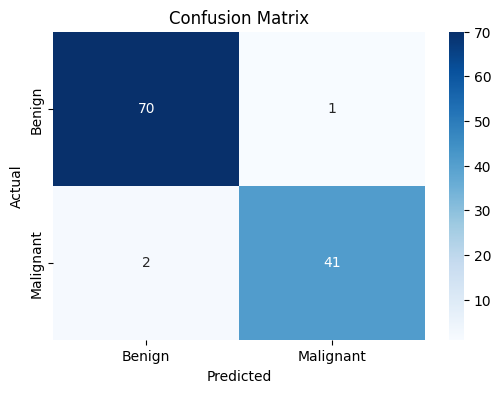

In [12]:
# 8. Visualization

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

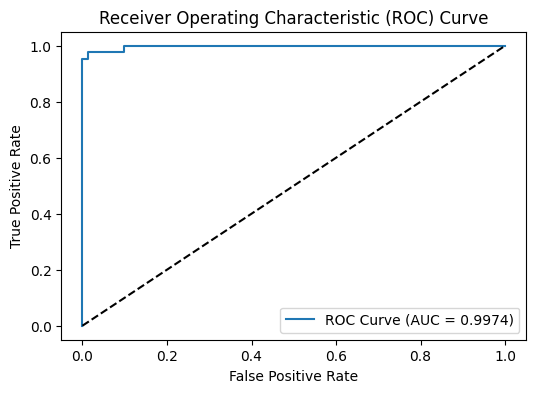

In [13]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
# 9. Threshold Tuning
# Analyze performance metrics at different thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_thresh_pred = (y_pred_prob >= thresh).astype(int)
    precision = precision_score(y_test, y_thresh_pred)
    recall = recall_score(y_test, y_thresh_pred)
    print(f"Threshold: {thresh:.1f} | Precision: {precision:.4f} | Recall: {recall:.4f}")

Threshold: 0.1 | Precision: 0.8571 | Recall: 0.9767
Threshold: 0.2 | Precision: 0.9130 | Recall: 0.9767
Threshold: 0.3 | Precision: 0.9130 | Recall: 0.9767
Threshold: 0.4 | Precision: 0.9767 | Recall: 0.9767
Threshold: 0.5 | Precision: 0.9762 | Recall: 0.9535
Threshold: 0.6 | Precision: 1.0000 | Recall: 0.9535
Threshold: 0.7 | Precision: 1.0000 | Recall: 0.9535
Threshold: 0.8 | Precision: 1.0000 | Recall: 0.9302
